In [4]:
pip install imageio matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
from IPython.display import HTML

CREATING . . .


/home/josorioam/anaconda3/lib/python3.13/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


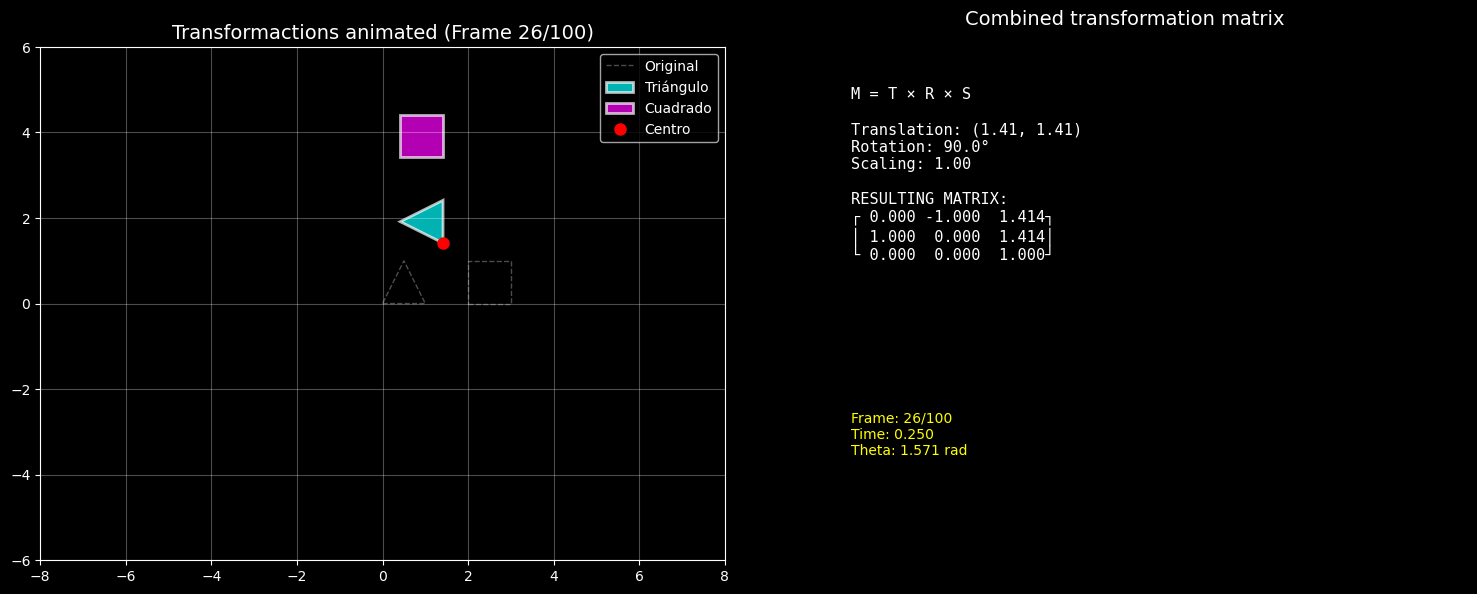

Saving animation as transforms2d.gif...


/tmp/ipykernel_1896402/3998865086.py:182: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(frame_path))


GIF saved as transforms2d.gif


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import imageio
import os
from matplotlib.patches import Polygon
import tempfile

# configuracion para el fondo
plt.style.use('dark_background')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# matrices para posiciones de triangulo y cuadrado 
initialTriangle = np.array([
    [0, 1, 0.5, 0],    
    [0, 0, 1, 0],   
    [1, 1, 1, 1]     
])

initialSquare = np.array([
    [2, 3, 3, 2, 2],  
    [0, 0, 1, 1, 0],   
    [1, 1, 1, 1, 1]   
])

# matriz básica de traslación 2D
def translationMatrix(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

# matriz básica de rotación 2D
def rotationMatrix(theta):
    cos_t = np.cos(theta)
    sin_t = np.sin(theta)
    return np.array([
        [cos_t, -sin_t, 0],
        [sin_t,  cos_t, 0],
        [0,      0,     1]
    ])

# matriz básica de escalamiento 2D
def scalingMatrix(sx, sy):
    return np.array([
        [sx, 0,  0],
        [0,  sy, 0],
        [0,  0,  1]
    ])

# aplica transformación matricial (multiplica las matrices)
def applyTransform(puntos, matriz):
    return matriz @ puntos

# animacion de cada frame
def animateTransform(frame):
    ax1.clear()
    ax2.clear()
    t = frame / 100.0
    # parametro de transformación de rotación completa
    theta = 2 * np.pi * t
    # parametro de transformación de traslación con movimiento circular
    tx = 2 * np.cos(0.5 * theta)
    ty = 2 * np.sin(0.5 * theta)
    # parametro de transformación de escalamiento entre 0,5 y 1,5
    escala = 1 + 0.5 * np.sin(4 * np.pi * t)
    # creacion de matrices de transformación
    M_rotacion = rotationMatrix(theta)
    M_traslacion = translationMatrix(tx, ty)
    M_escala = scalingMatrix(escala, escala)
    # combinación de transformaciones
    M_combinada = M_traslacion @ M_rotacion @ M_escala
    # aplicación de transformaciones
    transformedTriangle = applyTransform(initialTriangle, M_combinada)
    transformedSquare = applyTransform(initialSquare, M_combinada)
    # graficar
    ax1.set_xlim(-8, 8)
    ax1.set_ylim(-6, 6)
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')
    ax1.set_title(f'Transformactions animated (Frame {frame+1}/100)', fontsize=14, color='white')
    # objetos iniciales
    ax1.plot(initialTriangle[0, :], initialTriangle[1, :], 'w--', alpha=0.3, linewidth=1, label='Original')
    ax1.plot(initialSquare[0, :], initialSquare[1, :], 'w--', alpha=0.3, linewidth=1)
    # objetos despues de la transformación
    ax1.fill(transformedTriangle[0, :], transformedTriangle[1, :], 
             color='cyan', alpha=0.7, edgecolor='white', linewidth=2, label='Triángulo')
    ax1.fill(transformedSquare[0, :], transformedSquare[1, :], 
             color='magenta', alpha=0.7, edgecolor='white', linewidth=2, label='Cuadrado')
    # Marcar centro de rotación
    ax1.plot(tx, ty, 'ro', markersize=8, label='Centro')
    ax1.legend()
    # mostrar matriz resultante
    ax2.axis('off')
    ax2.set_title('Combined transformation matrix', fontsize=14, color='white')
    # mostrar matriz resultante para ubicación de objetos
    matrix_str = "M = T × R × S\n\n"
    matrix_str += f"Translation: ({tx:.2f}, {ty:.2f})\n"
    matrix_str += f"Rotation: {np.degrees(theta):.1f}°\n"
    matrix_str += f"Scaling: {escala:.2f}\n\n"
    matrix_str += "RESULTING MATRIX:\n"
    matrix_str += f"┌{M_combinada[0,0]:6.3f} {M_combinada[0,1]:6.3f} {M_combinada[0,2]:6.3f}┐\n"
    matrix_str += f"│{M_combinada[1,0]:6.3f} {M_combinada[1,1]:6.3f} {M_combinada[1,2]:6.3f}│\n"
    matrix_str += f"└{M_combinada[2,0]:6.3f} {M_combinada[2,1]:6.3f} {M_combinada[2,2]:6.3f}┘"

    ax2.text(0.1, 0.9, matrix_str, transform=ax2.transAxes, fontsize=11, 
             verticalalignment='top', fontfamily='monospace', color='white')
    # descripcion de animación
    info_str = f"Frame: {frame+1}/100\n"
    info_str += f"Time: {t:.3f}\n"
    info_str += f"Theta: {theta:.3f} rad"
    ax2.text(0.1, 0.3, info_str, transform=ax2.transAxes, fontsize=10, 
             verticalalignment='top', color='yellow')

# creación de la animación
print("CREATING . . .")
anim = animation.FuncAnimation(fig, animateTransform, frames=100, interval=100, blit=False)

# Mostrar una muestra de la animación
plt.tight_layout()
animateTransform(25)  # Mostrar frame 25 como ejemplo
plt.show()

# guardar animación como gif
def saveGif(filename='transforms2d.gif', fps=10):
    print(f"Saving animation as {filename}...")
    # directorio temporal para almacenar frames
    temp_dir = tempfile.mkdtemp()
    frames_paths = []
    # generación de frames (100 en este caso)
    for frame in range(100):
        fig_temp, (ax1_temp, ax2_temp) = plt.subplots(1, 2, figsize=(15, 6))
        fig_temp.patch.set_facecolor('black')
        # animación
        t = frame / 100.0
        theta = 2 * np.pi * t
        tx = 2 * np.cos(0.5 * theta)
        ty = 2 * np.sin(0.5 * theta)
        escala = 1 + 0.5 * np.sin(4 * np.pi * t)
        M_rotacion = rotationMatrix(theta)
        M_traslacion = translationMatrix(tx, ty)
        M_escala = scalingMatrix(escala, escala)
        M_combinada = M_traslacion @ M_rotacion @ M_escala
        transformedTriangle = applyTransform(initialTriangle, M_combinada)
        transformedSquare = applyTransform(initialSquare, M_combinada)
        # configuración de grafica
        ax1_temp.set_xlim(-8, 8)
        ax1_temp.set_ylim(-6, 6)
        ax1_temp.grid(True, alpha=0.3)
        ax1_temp.set_aspect('equal')
        ax1_temp.set_title(f'Animated transforms (Frame {frame+1}/100)', fontsize=14)
        ax1_temp.set_facecolor('black')
        # dibujar formas
        ax1_temp.plot(initialTriangle[0, :], initialTriangle[1, :], 'w--', alpha=0.3, linewidth=1)
        ax1_temp.plot(initialSquare[0, :], initialSquare[1, :], 'w--', alpha=0.3, linewidth=1)
        ax1_temp.fill(transformedTriangle[0, :], transformedTriangle[1, :], 
                     color='cyan', alpha=0.7, edgecolor='white', linewidth=2)
        ax1_temp.fill(transformedSquare[0, :], transformedSquare[1, :], 
                     color='magenta', alpha=0.7, edgecolor='white', linewidth=2)
        ax1_temp.plot(tx, ty, 'ro', markersize=8)
        # configuracion de segunda grafica
        ax2_temp.axis('off')
        ax2_temp.set_title('Transformation matrix', fontsize=14)
        ax2_temp.set_facecolor('black')
        matrix_str = f"Frame {frame+1}/100\n"
        matrix_str += f"Rotation: {np.degrees(theta):.1f}°\n"
        matrix_str += f"Translation: ({tx:.2f}, {ty:.2f})\n"
        matrix_str += f"Scaling: {escala:.2f}"
        ax2_temp.text(0.1, 0.9, matrix_str, transform=ax2_temp.transAxes, 
                     fontsize=12, verticalalignment='top', color='white')
        # guardar frame en directorio temporal
        frame_path = os.path.join(temp_dir, f'frame_{frame:03d}.png')
        fig_temp.tight_layout()
        fig_temp.savefig(frame_path, facecolor='black', dpi=80)
        frames_paths.append(frame_path)
        plt.close(fig_temp)

    # creacion de GIF por medio de imageIO  
    images = []
    for frame_path in frames_paths:
        images.append(imageio.imread(frame_path))
    imageio.mimsave(filename, images, fps=fps, loop=0)
    # eliminar archivos temporales
    for frame_path in frames_paths:
        os.remove(frame_path)
    os.rmdir(temp_dir)
    print(f"GIF saved as {filename}")

# guardar gif
saveGif('transforms2d.gif', fps=10)